In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv');

In [3]:
df=data

In [4]:
data.shape

(7043, 21)

In [5]:
# les 5 premières lignes. 
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#types de données
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Les valeurs uniques de chaque colonne
for c in data.columns:
    
    print("Feature name: {}".format(c))
    print("Unique values:\n")
    print(data[c].unique())
    print("\n--------------------------------------------------\n")

Feature name: customerID
Unique values:

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--------------------------------------------------

Feature name: gender
Unique values:

['Female' 'Male']

--------------------------------------------------

Feature name: SeniorCitizen
Unique values:

[0 1]

--------------------------------------------------

Feature name: Partner
Unique values:

['Yes' 'No']

--------------------------------------------------

Feature name: Dependents
Unique values:

['No' 'Yes']

--------------------------------------------------

Feature name: tenure
Unique values:

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

--------------------------------------------------

Feature name: PhoneService
Unique values:

['No' 'Yes']

----------------------------

In [8]:
# compter le nombre de valeurs uniques
data.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
# Somme des valeurs nulles
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# encodage des données avec get dummies
data = pd.get_dummies(data, columns=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection"
                      ,"TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"], drop_first=True)

In [11]:
#encodage des données avec labelencoder
#Gender
#1 male,0 female
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Gender_encode = le.fit_transform(data["gender"])
Gender_encode_df = pd.DataFrame(data = Gender_encode, columns=["gender"],index=data.index)
data["gender"]=Gender_encode_df
#Partner
#1 oui,0 non
Gender_encode = le.fit_transform(data["Partner"])
Gender_encode_df = pd.DataFrame(data = Gender_encode, columns=["Partner"],index=data.index)
data["Partner"]=Gender_encode_df
#dependents
#1 oui,0 non
Gender_encode = le.fit_transform(data["Dependents"])
Gender_encode_df = pd.DataFrame(data = Gender_encode, columns=["Dependents"],index=data.index)
data["Dependents"]=Gender_encode_df
#Phone Service
#1 oui,0 non
Gender_encode = le.fit_transform(data["PhoneService"])
Gender_encode_df = pd.DataFrame(data = Gender_encode, columns=["PhoneService"],index=data.index)
data["PhoneService"]=Gender_encode_df
#encodage paperlessbilling
Gender_encode = le.fit_transform(data["PaperlessBilling"])
Gender_encode_df = pd.DataFrame(data = Gender_encode, columns=["PaperlessBilling"],index=data.index)
data["PaperlessBilling"]=Gender_encode_df
#encodage churn
Gender_encode = le.fit_transform(data["Churn"])
Gender_encode_df = pd.DataFrame(data = Gender_encode, columns=["Churn"],index=data.index)
data["Churn"]=Gender_encode_df





In [12]:
#type de données
data.dtypes

customerID                                object
gender                                     int32
SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
tenure                                     int64
PhoneService                               int32
PaperlessBilling                           int32
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int32
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes

In [13]:
#remplacer les espaces par des 0 (TotalCharges)
data.TotalCharges.replace({" ": "0"},inplace=True)


In [14]:
#object to float totalcharges
data["TotalCharges"] = data["TotalCharges"].astype("float") 
data["TotalCharges"]. dtype

dtype('float64')

In [15]:
# supprimer la colonne customerID
data = data.drop(['customerID'], axis=1)


In [16]:
# les 5 premières lignes. 
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


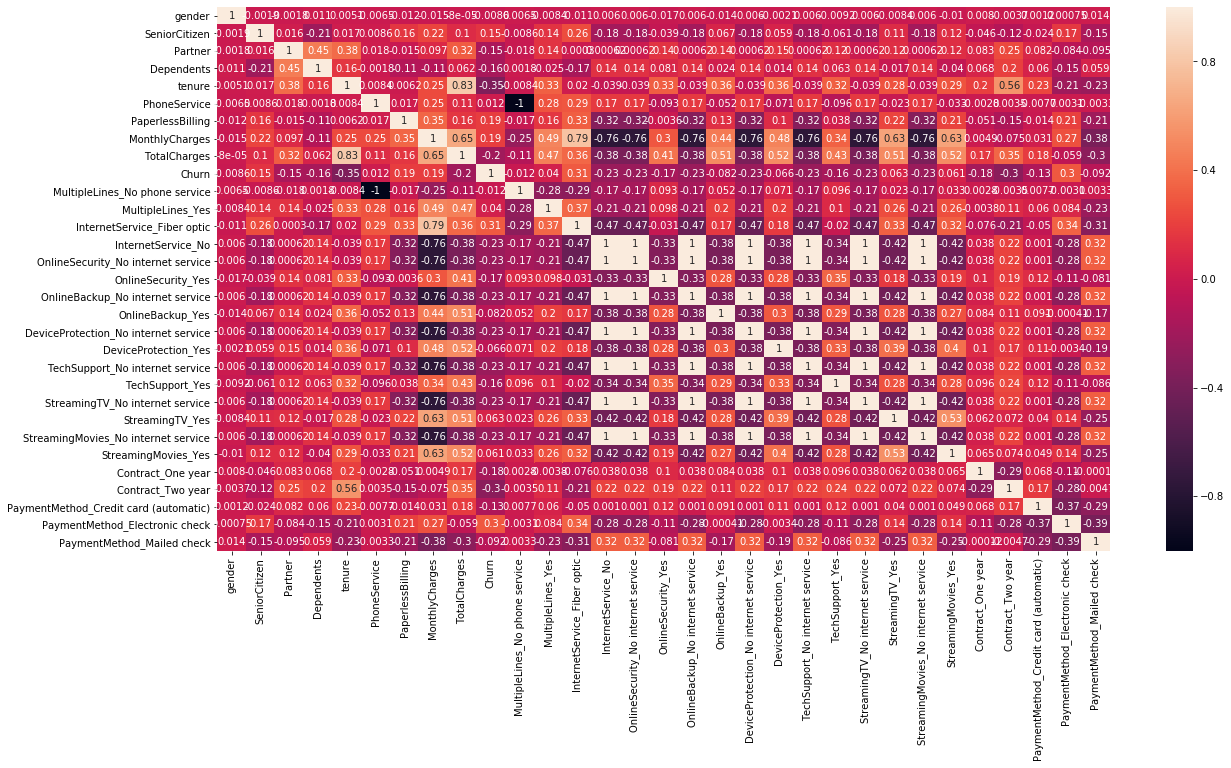

In [17]:
#correlations entre les différentes colonnes
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(data,show_chart=True)



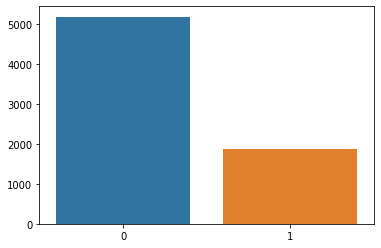

In [18]:
#nombre des clients qui ont ou pas churnée
y = data["Churn"].value_counts()
sns.barplot(y.index, y.values)

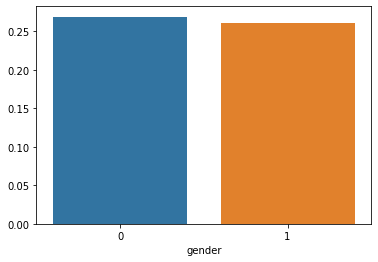

In [19]:
#Le pourcentage de churn est presque égal dans le cas des hommes et des femmes.
y=data.groupby('gender').Churn.mean()
sns.barplot(y.index, y.values)

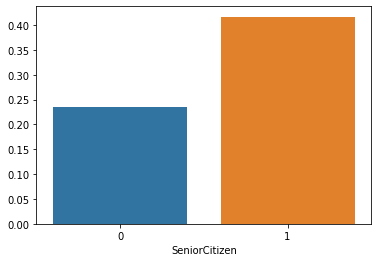

In [20]:
#Le pourcentage de churn est plus élevé dans le cas des Seniors Citizens
y=data.groupby('SeniorCitizen').Churn.mean()
sns.barplot(y.index, y.values)


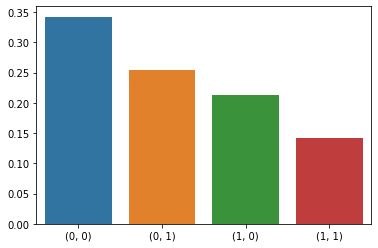

In [21]:
#Les clients avec des partenaires et des personnes à charge ont un taux de churn plus faible que ceux qui 
#n'ont pas de partenaires et de personnes à charge

y=data.groupby(['Dependents','Partner']).Churn.mean()
sns.barplot(y.index, y.values)



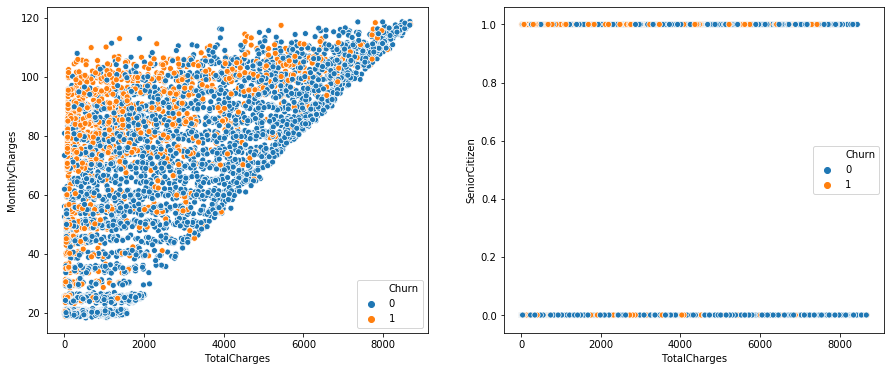

In [22]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "TotalCharges", y = "MonthlyCharges", data = data, hue="Churn", ax = ax[0])
sns.scatterplot(x = "TotalCharges", y = "SeniorCitizen", data = data, hue="Churn", ax = ax[1])

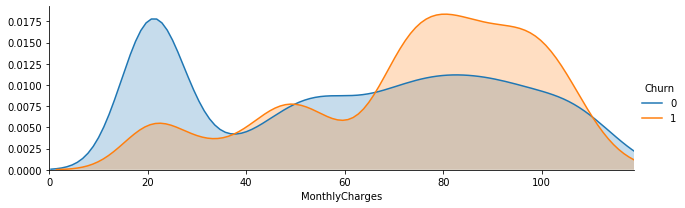

In [23]:
facet = sns.FacetGrid(data, hue="Churn",aspect=3)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.set(xlim=(0, data["MonthlyCharges"].max()))
facet.add_legend()

plt.show()

In [24]:
#corrélation avec la variable churn
show_correlations(data, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


<Figure size 1440x720 with 0 Axes>

In [25]:
#Appliquer le Knn

In [26]:
data1=data

In [27]:
#Separer les variables explicatives de la variable cible
y= data['Churn']
X= data1.drop(['Churn'], axis=1)



In [28]:
# shape des données explicatives
X.shape

(7043, 30)

In [29]:
#Diviser les données en donnéés d'apprentissage et donnéés de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 , random_state=0)

In [30]:
#Centrage réduction des données (rendre les variables sur le meme échelle )
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [31]:
#Separer les variables explicatives de la variable cible
try:
    label = data['Churn'] # Remove the label before training the model
    del data['Churn']
except:
    print("label already removed.")

KNeighborsClassifier
0.762 
 - - - - -  

DecisionTreeClassifier
0.788 
 - - - - -  



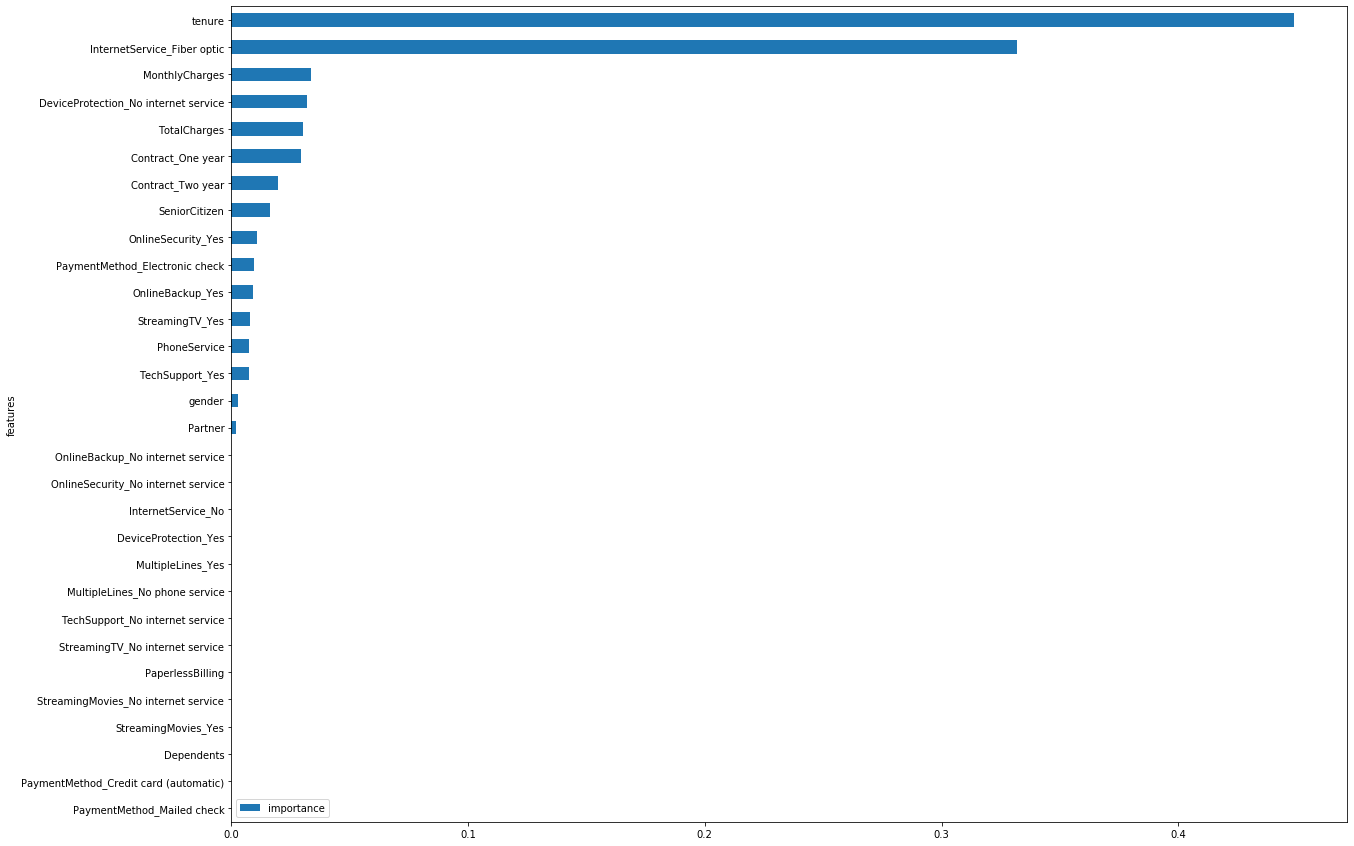

In [32]:
#Courbe de representation de l'importance de chaque variable par rapport au churn
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(data, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = data.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))


In [33]:
#Appliquez knn avec les données d'apprentissage
from sklearn.neighbors import KNeighborsClassifier


Text(0, 0.5, 'Erreur')

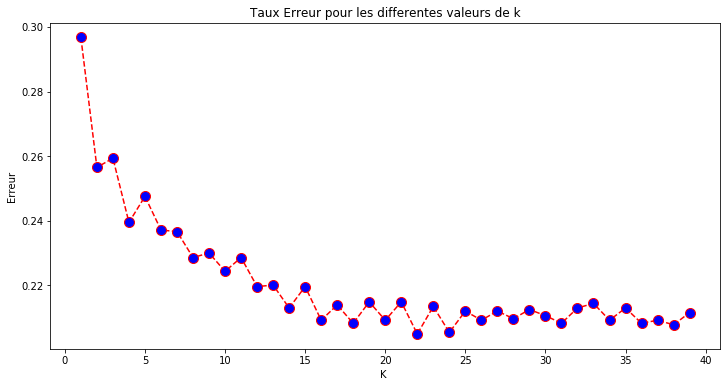

In [34]:
error = []
# Calculer l'erreur pour k entre 1 et 40
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [35]:
# knn avec k =24
knn = KNeighborsClassifier(24)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [36]:
# Accuracy du modéle
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.79


In [37]:
# fonction de plot de la matrice de confusion
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1373  187]
 [ 256  297]]


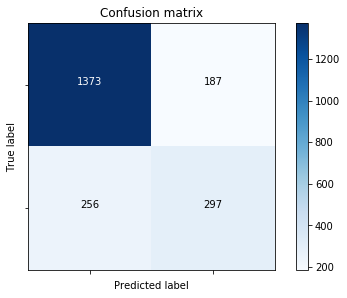

In [40]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
plt.figure()
class_names = ['','']
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), classes=class_names,
                      title='Confusion matrix')


In [39]:
#Créer un rapport texte montrant les principales mesures de classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1560
           1       0.61      0.54      0.57       553

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



La classe 0 est plus performate que l'autre classe

In [245]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [246]:

fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_knn)
roc_auc2 = auc(fpr2, tpr2)

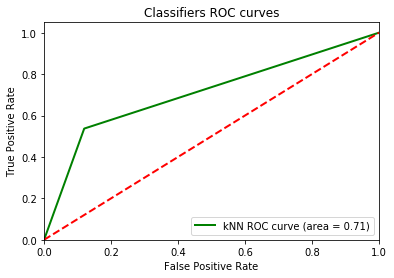

In [247]:
#graphique montrant les performances d'un modèle de classification à tous les seuils de classification. 
#Cette courbe trace deux paramètres:
##Taux de vrais positifs
##Taux de faux positifs
plt.figure() 

plt.plot(fpr2, tpr2, color='green', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

# 2ème méthode (GridSearch) qui calcule k (le nombre de voisin) et p (leaf size)

In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [71]:
## Calculer l'erreur pour k entre 1 et 20 (2ème méthode)
leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 7
Best p: 1
Best n_neighbors: 16


In [249]:
knn = KNeighborsClassifier(16,p=1,leaf_size=7)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [250]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.79


In [251]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[1386  174]
 [ 267  286]]


In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1560
           1       0.62      0.52      0.56       553

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [ ]:
#maintenant on va prendre 2 sample egaux du dataset pour qu'on puisse cibler les
#clients qui n'ont pas churné mais qui sont susceptibles de churné

In [253]:
#convertir les chaînes en minuscules.
for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")


SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


In [254]:
#Convertir tous les oui et non en 0 et 1 afin que notre classificateur puisse utiliser ces données.
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,...,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,...,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,...,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,...,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,...,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [255]:
#total charges to float
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [256]:
#remplacer les chaines vides par des 0
df = df.fillna(value=0)

In [257]:
#équilibrer notre dataset afin d'avoir le même nombre de churn que les non churn
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df2 = churners.append(non_churners)


Number of churners 1869
Number of non-churners 1869


In [258]:
#Construire notre modéle 
try:
    customer_id = df2['customerID'] # Store this as customer_id variable
    del df2['customerID'] # Don't need in ML DF
except:
    print("already removed customerID")

In [259]:
#encodage des données avec getdummies 
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99.65,820.50,1,1,...,0,0,1,1,0,0,0,0,1,0
8,0,1,0,28,1,1,104.80,3046.05,1,1,...,0,0,1,1,0,0,0,0,1,0
13,0,0,0,49,1,1,103.70,5036.30,1,0,...,0,0,1,1,0,0,1,0,0,0


In [260]:
# Ajouter une colonne nommé randomColumn au dataframe
ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

In [261]:
#corrélation avec la variable churn
show_correlations(ml_dummies, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_month-to-month                    0.478439
TechSupport_no                             0.404618
OnlineSecurity_no                          0.402111
InternetService_fiber optic                0.351229
PaymentMethod_electronic check             0.331816
OnlineBackup_no                            0.302877
DeviceProtection_no                        0.296415
MonthlyCharges                             0.233574
PaperlessBilling                           0.215388
StreamingTV_no                             0.162968
SeniorCitizen                              0.159674
StreamingMovies_no                         0.156419
StreamingMovies_yes                        0.069800
StreamingTV_yes                            0.063229
MultipleLines_yes                          0.045905
PhoneService                               0.020780
gender_female                              0.005350
---randomColumn---                         0.000467
gender_male 

<Figure size 1440x720 with 0 Axes>

In [262]:
#Separer les variables explicatives de la variable cible
try:
    label = ml_dummies['Churn'] # Remove the label before training the model
    del ml_dummies['Churn']
except:
    print("label already removed.")

KNeighborsClassifier
0.656 
 - - - - -  

DecisionTreeClassifier
0.759 
 - - - - -  



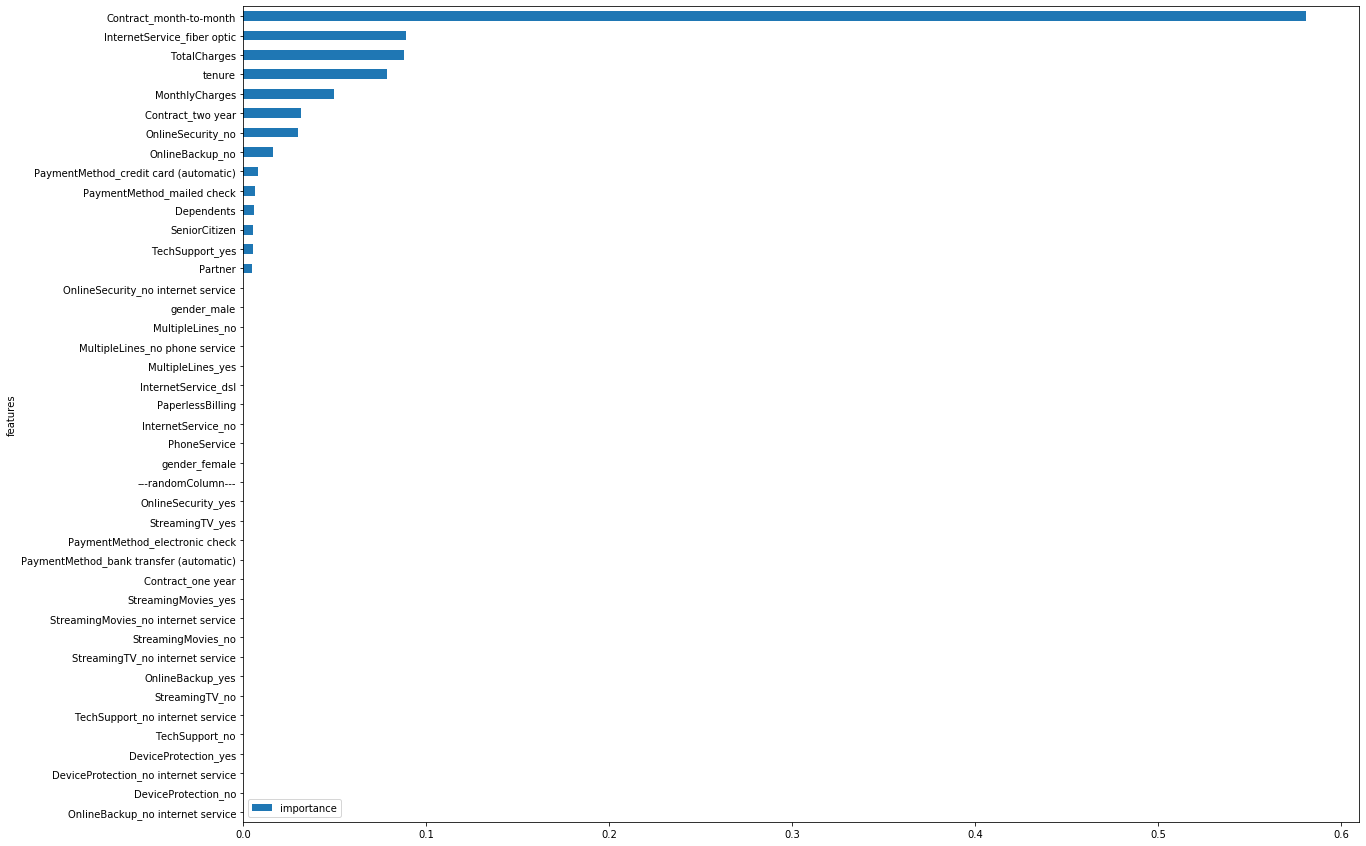

In [263]:
#Courbe de representation de l'importance de chaque variable par rapport au churn
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

Confusion matrix, without normalization
[[434 142]
 [128 418]]


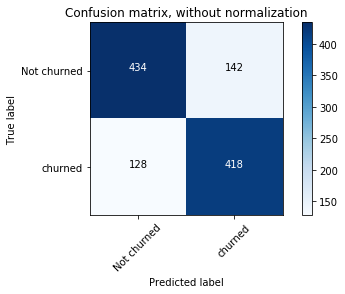

<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

 Not churned       0.77      0.75      0.76       576
     churned       0.75      0.77      0.76       546

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



In [269]:
#Matrice de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()


plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)

In [270]:
# Faire des prédictions sur l'ensemble de données
def preprocess_df(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
    except:
        print("already removed customerID")
    ml_dummies = pd.get_dummies(x)
    ml_dummies.fillna(value=0, inplace=True)

    # import random done above
    ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

    try:
        label = ml_dummies['Churn']
        del ml_dummies['Churn']
    except:
        print("label already removed.")
    return ml_dummies, customer_id, label

original_df = preprocess_df(df)

In [271]:
output_df = original_df[0].copy()
output_df['---randomColumn---']
output_df['prediction'] = clf.predict_proba(output_df)[:,1]
output_df['churn'] = original_df[2]
output_df['customerID'] = original_df[1]

In [272]:
#Calcul des probabilité de churn et non churn
print('Mean predict proba of churn:',round(output_df[output_df['churn'] == 1]['prediction'].mean(),2))
print('Mean predict proba of NON-churn:',round(output_df[output_df['churn'] == 0]['prediction'].mean(),2))

Mean predict proba of churn: 0.69
Mean predict proba of NON-churn: 0.32


In [273]:
#Ciblons maintenant les clients qui n'ont pas churné mais qui sont susceptibles de le faire.
activate = output_df[output_df['churn'] == 0]
activate[['customerID','churn','prediction']]

,customerID,churn,prediction
0,7590-vhveg,0,0.780220
1,5575-gnvde,0,0.212766
3,7795-cfocw,0,0.052174
6,1452-kiovk,0,0.690821
7,6713-okomc,0,0.589286
9,6388-tabgu,0,0.212766
10,9763-grskd,0,0.589286
11,7469-lkbci,0,0.012195
12,8091-ttvax,0,0.500000
14,5129-jlpis,0,0.690821
